In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json 
import os



mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams["text.usetex"] = True



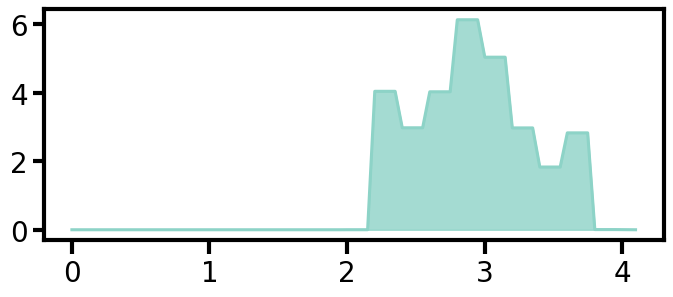

In [2]:
with open("./Data/opt_schedule.json", "r") as file:
    schedule = json.load(file)

omegas = [0,0] + [i for i in schedule["omega_list"] for _ in range(2)] + [0]
deltas = [0,0] + [i for i in schedule["delta_list"] for _ in range(2)] + [0]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])

t_tot = 2.0e-6
t_q = 0.052e-6
t_p = t_tot/num_pulses-t_q
t_delay = round(1.95e-6,9)
times = [0 , t_delay]
t_i = t_delay
for i in range(0, num_pulses):
    t_i += round(t_q,9)
    times.append(t_i)
    t_i += round(t_p,9)
    times.append(t_i)
times.append(round(t_i+t_p,9))

fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(omegas), color= colors(0))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(omegas), color= colors(0), alpha=0.8)
fig.savefig("./Figures/omegas.pdf", bbox_inches="tight", transparent=True)

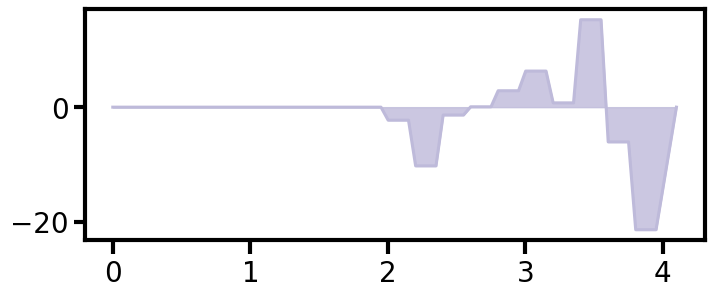

In [20]:
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(deltas), color= colors(2))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(deltas), color= colors(2), alpha=0.8)
fig.savefig("./Figures/deltas.pdf", bbox_inches="tight", transparent=True)

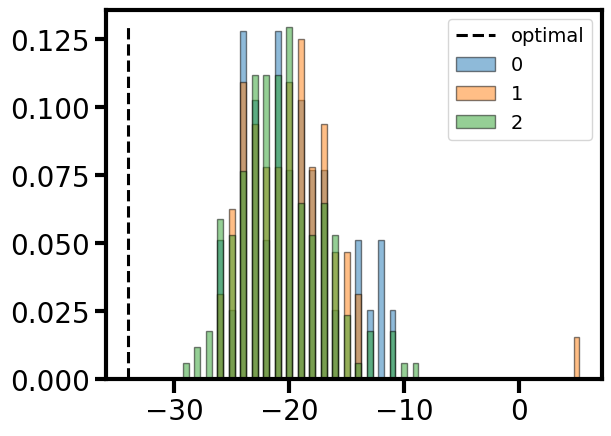

In [80]:
nq = 100
backend_name = "braket_emulator"
backend_name = "quera_aquila"
extra = "_2"


fig, ax = plt.subplots()
for nn, extra in enumerate(["", "_1", "_2"]):
    with open(f"./Data/{backend_name}/{nq}{extra}.json", "r") as file:
        result = json.load(file)
    keys = [int(i) for i in result["cost"].keys()]
    res_i = [result["cost"][str(i)]/sum(result["cost"].values()) for i in keys]
    ax.bar(keys, res_i, label=nn, edgecolor="black",width=0.5, alpha=0.5)
ax.vlines(result["min_cost"], 0, max(res_i), color="black", linestyle="--", label="optimal")
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{backend_name}/{nq}.pdf", bbox_inches="tight", transparent=True)

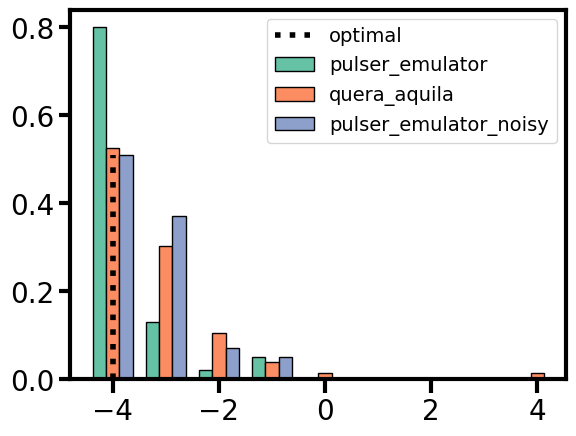

In [25]:
nq = 13
backends = ["pulser_emulator","quera_aquila","pulser_emulator_noisy"]
colors= plt.get_cmap("Set2")
results = {}
for backend_name in backends:
    with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.25
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=backend_name, edgecolor="black",width=width, color=colors(nn))
ax.vlines(results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{nq}_comparison_QPUs.pdf", bbox_inches="tight", transparent=True)

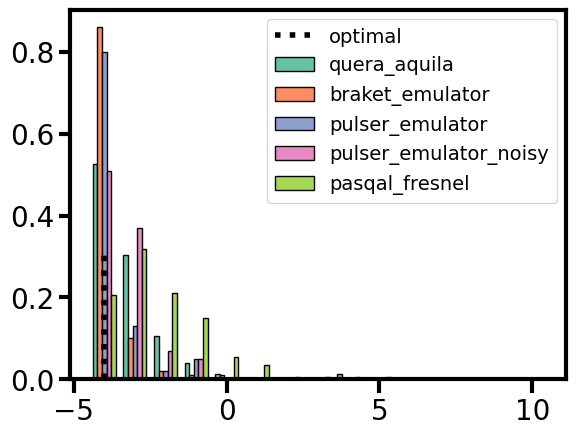

In [28]:
nq = 13
backends = ["quera_aquila","braket_emulator", "pulser_emulator", "pulser_emulator_noisy","pasqal_fresnel"]
colors= plt.get_cmap("Set2")
results = {}
for backend_name in backends:
    with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.15
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=backend_name, edgecolor="black",width=width, color=colors(nn))
ax.vlines(results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{nq}_comparison.pdf", bbox_inches="tight", transparent=True)

/Users/alejomonbar/Documents/GitHub/Benchmarking-neutral-atom-QPUs/.conda/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


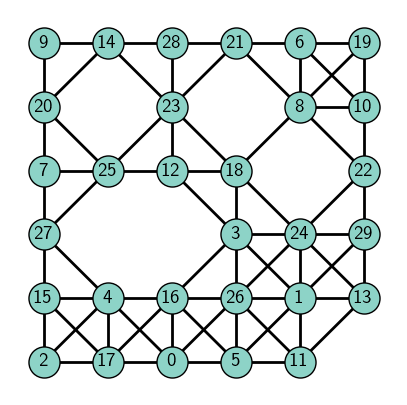

In [5]:
nq = 30
colors= plt.get_cmap("Set3")
backend_name = "braket_emulator"
with open(f"./Data/problems/{nq}.json", "r") as file:
    problem = json.load(file)
fig, ax = plt.subplots(figsize=(5,5))
G = nx.Graph()
G.add_edges_from(problem["edges"])
nx.draw(G, pos=problem["pos"], with_labels=True, node_size=500, node_color=colors(0), font_size=14, edgecolors="black", ax=ax, width=2)
fig.savefig(f"./Figures/Graphs/{nq}.pdf", bbox_inches="tight", transparent=True)

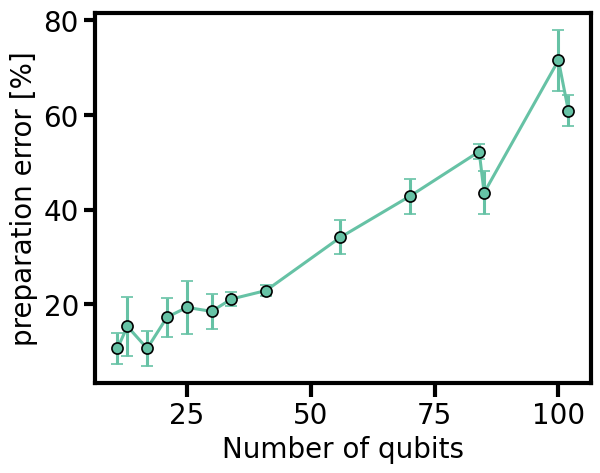

In [92]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_defects = []
for extra in ["", "_1", "_2"]:
    defects = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}{extra}.json", "r") as file:
            results = json.load(file)
        if "shots" not in results:
            results["shots"] = 100 if nq <= 30 else 200
        defects.append(results["defects"]/results["shots"])
    total_defects.append(defects)
total_defects = 100*np.array(total_defects).T
ax.errorbar(nqs, total_defects.mean(axis=1), total_defects.std(axis=1), capsize=4, marker="o", label=backend_name, color=colors(0), markeredgecolor="black", markersize=8)
ax.set_xlabel("Number of qubits")
ax.set_ylabel("preparation error [%]")
fig.savefig(f"./Figures/{backend_name}/defects.pdf", bbox_inches="tight", transparent=True)

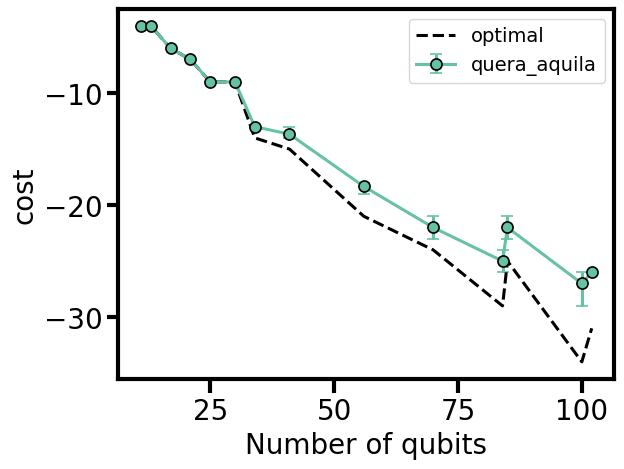

In [6]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")

nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
for extra in ["", "_1", "_2"]:
    cost = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}{extra}.json", "r") as file:
            results = json.load(file)
        cost.append(min([int(i) for i in results["cost"].keys()]))
        if extra =="":
            opt_cost.append(results["min_cost"])
    total_cost.append(cost)
    
total_cost = np.array(total_cost).T
ax.errorbar(nqs, total_cost.mean(axis=1), [-1*(total_cost.min(axis=1)-total_cost.mean(axis=1)),-1*(total_cost.mean(axis=1)- total_cost.max(axis=1))], capsize=4, marker="o", label=backend_name, color=colors(0), markeredgecolor="black", markersize=8)
ax.plot(nqs, opt_cost, color="black", linestyle="--", label="optimal")
ax.set_xlabel("Number of qubits")
ax.set_ylabel("cost")
ax.legend()
fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

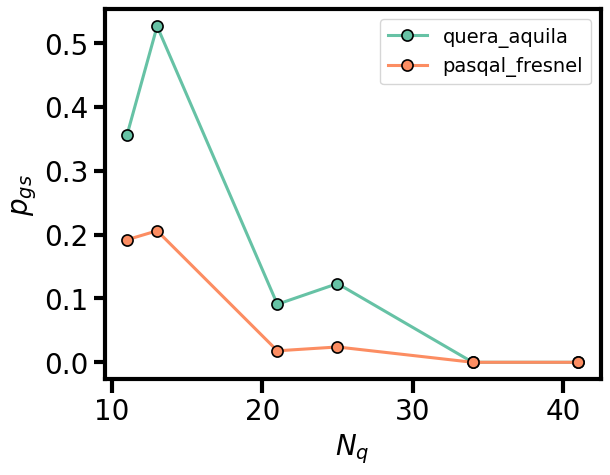

In [63]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
            results = json.load(file)
        prob.append((results["cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["cost"] else 0)/sum(results["cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$p_{gs}$")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

{'-4': 86, '-3': 1}
{'-4': 72, '-3': 4}
{'-7': 25, '-6': 41, '-5': 7, '-4': 4}
{'-8': 28, '-9': 41, '-7': 4}
{'-11': 51, '-10': 24, '-12': 44, '-13': 25, '-9': 9, '-8': 1, '-14': 1}
{'-12': 61, '-13': 46, '-11': 37, '-10': 19, '-14': 30, '-9': 3, '-15': 4}
{'-4': 491, '-3': 9}
{'-4': 471, '-3': 29}
{'-7': 198, '-6': 182, '-5': 90, '-4': 30}
{'-9': 259, '-8': 201, '-7': 37, '-6': 3}
{'-13': 101, '-11': 144, '-12': 137, '-10': 71, '-9': 23, '-8': 10, '-14': 14}
{'-13': 111, '-11': 108, '-12': 121, '-15': 16, '-14': 82, '-10': 50, '-9': 12}


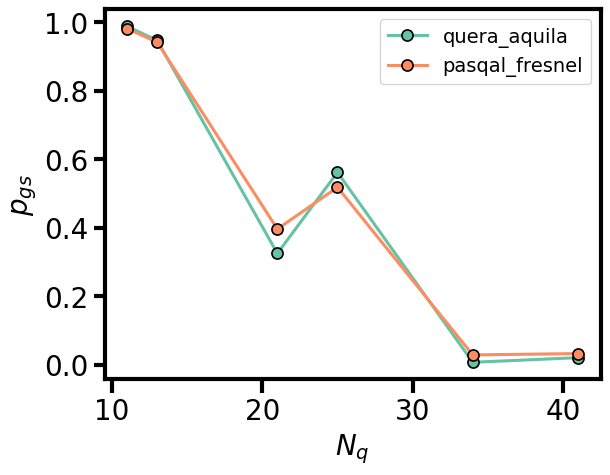

In [62]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
            results = json.load(file)
        print(results["greedy_cost"])
        prob.append(results["greedy_cost"][str(results["min_cost"])]/sum(results["greedy_cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$p_{gs}$")
ax.set_xlabel(r"$N_q$")
ax.legend()
fig.savefig(f"./Figures/pgs_greedy_comparison.pdf", bbox_inches="tight", transparent=True)

# Approximation ratio



quera_aquila 11 87
quera_aquila 13 76
quera_aquila 21 77
quera_aquila 25 73
quera_aquila 34 155
quera_aquila 41 200
pasqal_fresnel 11 500
pasqal_fresnel 13 500
pasqal_fresnel 21 500
pasqal_fresnel 25 500
pasqal_fresnel 34 500
pasqal_fresnel 41 500


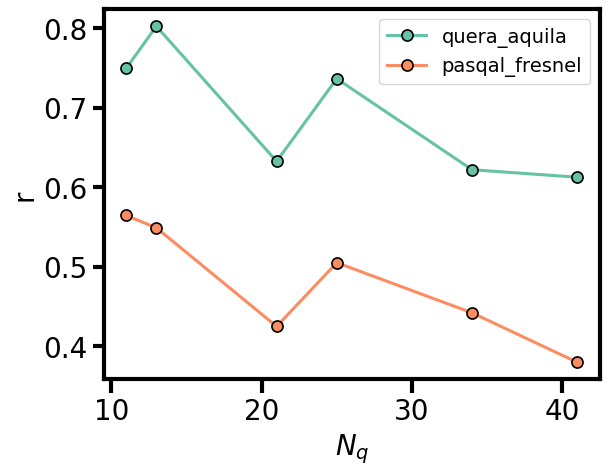

In [61]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
            results = json.load(file)
        print(backend_name, nq, sum(results["cost"].values()))
        prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

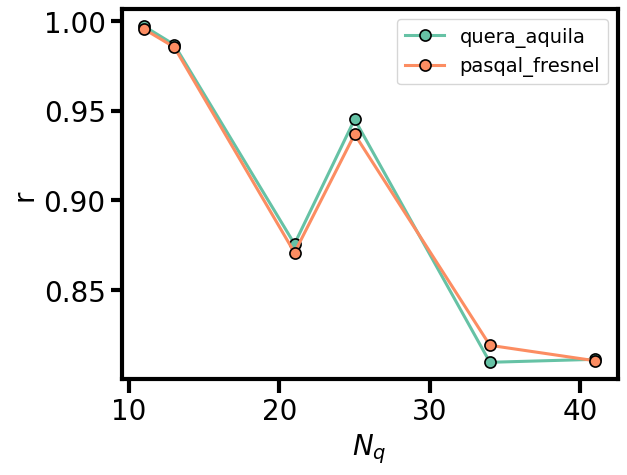

In [3]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{nq}.json", "r") as file:
            results = json.load(file)
        prob.append(sum([int(k)*v for k, v in results["greedy_cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

quera_aquila 11 87
quera_aquila 13 76
quera_aquila 17 85
quera_aquila 21 77
quera_aquila 25 73
quera_aquila 30 154
quera_aquila 34 155
quera_aquila 41 200
quera_aquila 56 124
quera_aquila 70 115
quera_aquila 84 92
quera_aquila 85 103
quera_aquila 100 39
quera_aquila 102 71


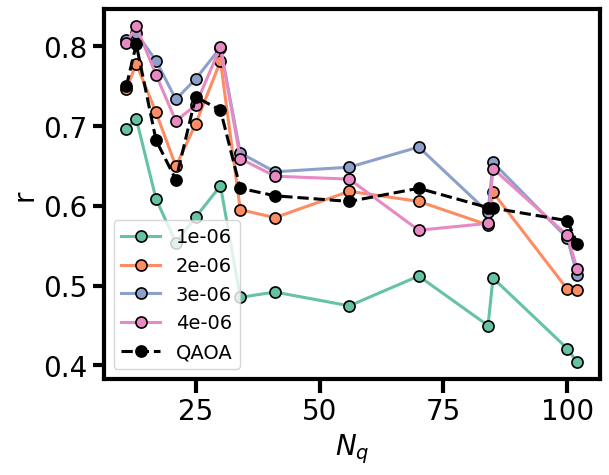

In [38]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
time = 1e-6
for ii, time in enumerate([1e-6, 2e-6, 3e-6, 4e-6]):
    for backend_name in backends_list:
        prob = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QA/{nq}_t_{time}.json", "r") as file:
                results = json.load(file)
            prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
        backend_probs[backend_name] = prob
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.plot(nqs, backend_probs[backend_name], label=time, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
    # ax.set_xlabel("Number of qubits")

backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{nq}.json", "r") as file:
            results = json.load(file)
        print(backend_name, nq, sum(results["cost"].values()))
        prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for jj, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label="QAOA", marker="o", linestyle="--", color="black", markeredgecolor="black", markersize=8)
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

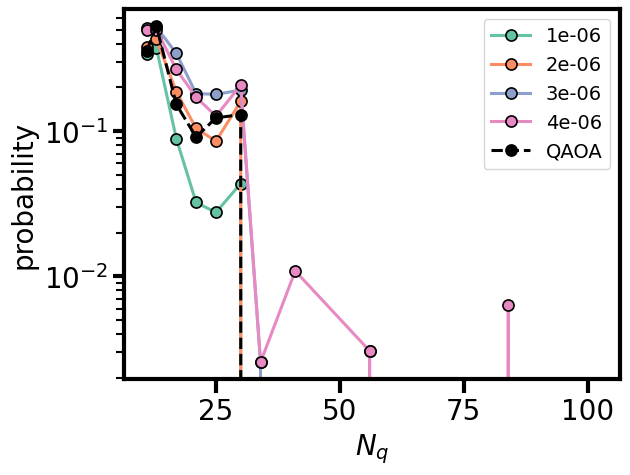

In [37]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
time = 1e-6
for ii, time in enumerate([1e-6, 2e-6, 3e-6, 4e-6]):
    for backend_name in backends_list:
        prob = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QA/{nq}_t_{time}.json", "r") as file:
                results = json.load(file)
            prob.append((results["cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["cost"].keys() else 0)/sum(results["cost"].values()))
        backend_probs[backend_name] = prob
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.plot(nqs, backend_probs[backend_name], label=time, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
    # ax.set_xlabel("Number of qubits")

backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{nq}.json", "r") as file:
            results = json.load(file)
        prob.append((results["cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["cost"].keys() else 0)/sum(results["cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for jj, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label="QAOA", marker="o", linestyle="--", color="black", markeredgecolor="black", markersize=8)
ax.set_ylabel(r"probability")
ax.set_xlabel(r"$N_q$")
ax.legend()
ax.set_yscale("log")
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

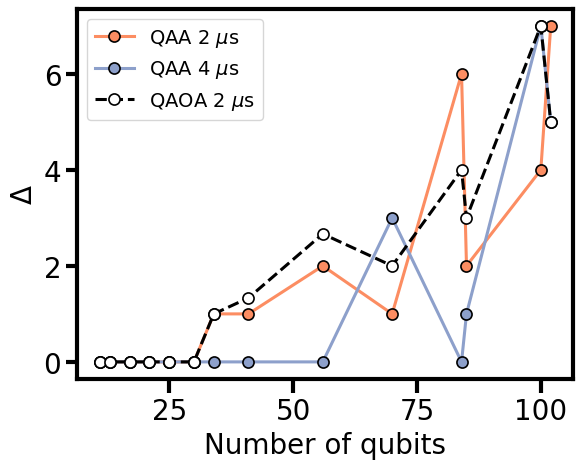

In [78]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")

nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
for extra in ["", "_1", "_2"]:
    cost = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{nq}{extra}.json", "r") as file:
            results = json.load(file)
        cost.append(min([int(i) for i in results["cost"].keys()]))
        if extra =="":
            opt_cost.append(results["min_cost"])
    total_cost.append(cost)
    
total_cost = np.array(total_cost).T
opt_cost = np.array(opt_cost)
# ax.plot(nqs, opt_cost, color="black", linestyle="--", label="optimal")


times= [2e-6,4e-6]
for ii, extra in enumerate(times):
    cost = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QA/{nq}_t_{extra}.json", "r") as file:
            results = json.load(file)
        cost.append(min([int(i) for i in results["cost"].keys()]))
    
    cost = np.array(cost).T
    ax.plot(nqs, cost - opt_cost, marker="o", label="QAA "+str(round(extra*1e6))+r" $\mu$s", color=colors(ii+1), markeredgecolor="black", markersize=8)
ax.plot(nqs, total_cost.mean(axis=1) - opt_cost, marker="o", label=r"QAOA 2 $\mu$s", linestyle="--", color="black", markerfacecolor="white", markeredgecolor="black", markersize=8)

ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$\Delta$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)